### Importing Data and Libraries

In [1]:
import pandas as pd 
import numpy as np 

# To convert from Json to list
import ast

# For knn 
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

# For visulazation
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
# Importing Dataset
df1=pd.read_csv('C:\\Machine Project\\dataset\\tmdb_6000_movie_dataset.csv')
df2=pd.read_csv('C:\\Machine Project\\dataset\\tmdb_6000_movie_credits.csv')

### Data Cleaning, Preprocessing, and Analysing

In [3]:
print(df1.shape)
df1.head(2)

(5798, 21)


,Unnamed: 0,budget,genres,homepage,tmdbId,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
#Before Cleaning
df1.describe()

,Unnamed: 0,budget,tmdbId,popularity,revenue,runtime,vote_average,vote_count
count,5798.000000,5.798000e+03,5.798000e+03,5798.000000,5.798000e+03,5796.000000,5798.000000,5798.000000
mean,2898.500000,3.065070e+07,1.475247e+05,37.411062,9.073563e+07,106.797619,6.207055,1042.932908
std,1673.882762,4.557490e+07,2.513144e+05,108.631223,1.876109e+08,23.512057,1.231623,2118.193529
min,0.000000,0.000000e+00,5.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1449.250000,0.000000e+00,9.682250e+03,6.132226,0.000000e+00,93.000000,5.700000,61.000000
50%,2898.500000,1.300000e+07,2.364300e+04,17.810838,1.864565e+07,104.000000,6.361500,286.000000
75%,4347.750000,4.000000e+07,1.813182e+05,39.003861,9.754978e+07,118.000000,6.986000,988.000000
max,5797.000000,4.600000e+08,1.181678e+06,4086.981000,2.800000e+09,338.000000,10.000000,27822.000000


              Unnamed: 0    budget    tmdbId  popularity   revenue   runtime  \
Unnamed: 0      1.000000 -0.424089  0.587223    0.141902 -0.257440 -0.221404   
budget         -0.424089  1.000000 -0.053117    0.182977  0.729577  0.307938   
tmdbId          0.587223 -0.053117  1.000000    0.350711 -0.025852 -0.109366   
popularity      0.141902  0.182977  0.350711    1.000000  0.187354  0.062935   
revenue        -0.257440  0.729577 -0.025852    0.187354  1.000000  0.270016   
runtime        -0.221404  0.307938 -0.109366    0.062935  0.270016  1.000000   
vote_average    0.049470  0.098372  0.047163    0.141662  0.200874  0.326969   
vote_count      0.036779  0.542252  0.115359    0.156030  0.698246  0.253604   

              vote_average  vote_count  
Unnamed: 0        0.049470    0.036779  
budget            0.098372    0.542252  
tmdbId            0.047163    0.115359  
popularity        0.141662    0.156030  
revenue           0.200874    0.698246  
runtime           0.326969    0.2

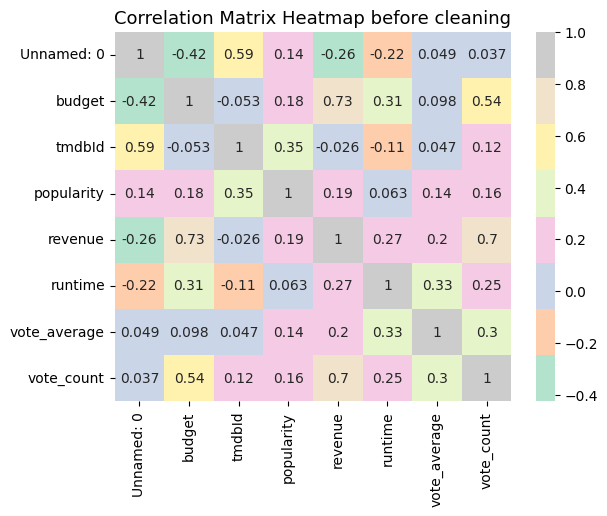

In [5]:
#Before Cleaning
# Select only numeric columns for the correlation matrix
numeric_df = df1.select_dtypes(include=[np.number])

#Correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel2')

# Add a title to the heatmap
plt.title('Correlation Matrix Heatmap before cleaning', fontsize=13)
plt.show()

In [6]:
df1.columns

Index(['Unnamed: 0', 'budget', 'genres', 'homepage', 'tmdbId', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')

In [7]:
# Check for missing values
missing_values = df1.isnull().any()

# Check for duplicates
duplicates = df1.duplicated().any()

# Print the results
print("Missing Values:")
print(missing_values)
print("\nDuplicates:")
print(duplicates)

Missing Values:
Unnamed: 0              False
budget                  False
genres                  False
homepage                 True
tmdbId                  False
keywords                False
original_language       False
original_title          False
overview                 True
popularity              False
production_companies    False
production_countries    False
release_date             True
revenue                 False
runtime                  True
spoken_languages        False
status                  False
tagline                  True
title                   False
vote_average            False
vote_count              False
dtype: bool

Duplicates:
False


In [8]:
print(df1['release_date'].isnull().sum())
print(df1['runtime'].isnull().sum())

df1.dropna(subset=['release_date', 'runtime'], inplace=True)

1
2


In [9]:
#fill missing values with a default description
df1['overview'] = df1['overview'].fillna('No overview available')
# Count missing values in the 'overview' column
overview_missing_count = df1['overview'].isnull().sum()

# Print the count of missing values in the 'overview' column
print("Count of missing values in the 'overview' column:", overview_missing_count)

Count of missing values in the 'overview' column: 0


In [10]:
# Check for missing values
missing_values = df1.isnull().any()

# Check for duplicates
duplicates = df1.duplicated().any()

# Print the results
print("Missing Values:")
print(missing_values)
print("\nDuplicates:")
print(duplicates)

Missing Values:
Unnamed: 0              False
budget                  False
genres                  False
homepage                 True
tmdbId                  False
keywords                False
original_language       False
original_title          False
overview                False
popularity              False
production_companies    False
production_countries    False
release_date            False
revenue                 False
runtime                 False
spoken_languages        False
status                  False
tagline                  True
title                   False
vote_average            False
vote_count              False
dtype: bool

Duplicates:
False


In [11]:
#After Cleaning
df1.describe()

,Unnamed: 0,budget,tmdbId,popularity,revenue,runtime,vote_average,vote_count
count,5795.000000,5.795000e+03,5.795000e+03,5795.000000,5.795000e+03,5795.000000,5795.000000,5795.000000
mean,2898.042105,3.066398e+07,1.473922e+05,37.430293,9.078260e+07,106.816048,6.209008,1043.470751
std,1674.092417,4.558267e+07,2.513103e+05,108.656053,1.876481e+08,23.472183,1.226446,2118.609868
min,0.000000,0.000000e+00,5.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1448.500000,0.000000e+00,9.680500e+03,6.147409,0.000000e+00,93.000000,5.700000,62.000000
50%,2898.000000,1.300000e+07,2.362900e+04,17.834976,1.866203e+07,104.000000,6.363000,286.000000
75%,4347.500000,4.000000e+07,1.803395e+05,39.005387,9.756165e+07,118.000000,6.986000,989.500000
max,5797.000000,4.600000e+08,1.181678e+06,4086.981000,2.800000e+09,338.000000,10.000000,27822.000000


              Unnamed: 0    budget    tmdbId  popularity   revenue   runtime  \
Unnamed: 0      1.000000 -0.423991  0.587169    0.142019 -0.257357 -0.221042   
budget         -0.423991  1.000000 -0.052832    0.182899  0.729544  0.307972   
tmdbId          0.587169 -0.052832  1.000000    0.350999 -0.025605 -0.108843   
popularity      0.142019  0.182899  0.350999    1.000000  0.187285  0.062777   
revenue        -0.257357  0.729544 -0.025605    0.187285  1.000000  0.270124   
runtime        -0.221042  0.307972 -0.108843    0.062777  0.270124  1.000000   
vote_average    0.051232  0.097699  0.049144    0.141751  0.201015  0.324300   
vote_count      0.036921  0.542191  0.115657    0.155958  0.698209  0.253675   

              vote_average  vote_count  
Unnamed: 0        0.051232    0.036921  
budget            0.097699    0.542191  
tmdbId            0.049144    0.115657  
popularity        0.141751    0.155958  
revenue           0.201015    0.698209  
runtime           0.324300    0.2

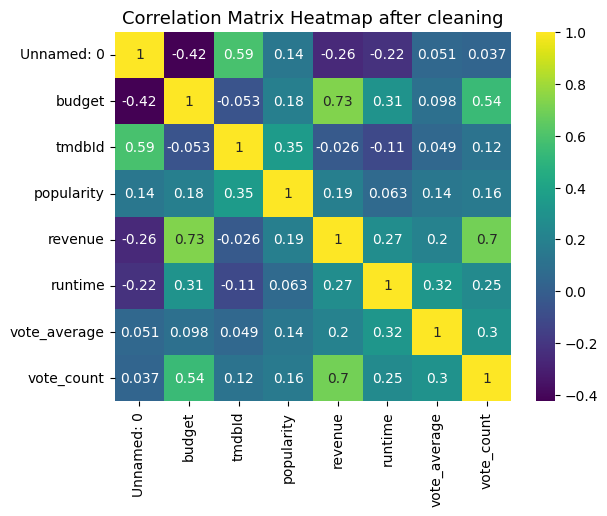

In [12]:
#After Cleaning
# Select only numeric columns for the correlation matrix
numeric_df = df1.select_dtypes(include=[np.number])

#Correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

# Add a title to the heatmap
plt.title('Correlation Matrix Heatmap after cleaning', fontsize=13)
plt.show()

In [13]:
print(df2.shape)
df2.head(2)

(5798, 4)


,Unnamed: 0,tmdbId,cast,crew
0,0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [14]:
#Before Cleaning
df2.describe()

,Unnamed: 0,tmdbId
count,5798.000000,5.798000e+03
mean,2898.500000,1.475247e+05
std,1673.882762,2.513144e+05
min,0.000000,5.000000e+00
25%,1449.250000,9.682250e+03
50%,2898.500000,2.364300e+04
75%,4347.750000,1.813182e+05
max,5797.000000,1.181678e+06


            Unnamed: 0    tmdbId
Unnamed: 0    1.000000  0.587223
tmdbId        0.587223  1.000000


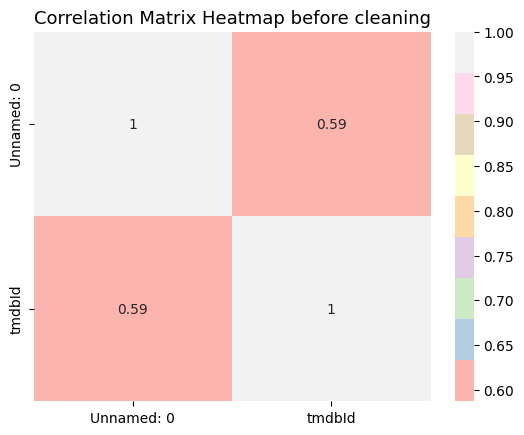

In [15]:
#Before Cleaning
# Select only numeric columns for the correlation matrix
numeric_df = df2.select_dtypes(include=[np.number])

#Correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1')

# Add a title to the heatmap
plt.title('Correlation Matrix Heatmap before cleaning', fontsize=13)
plt.show()

In [16]:
# Check for missing values
missing_values = df2.isnull().any()

# Check for duplicates
duplicates = df2.duplicated().any()

# Print the results
print("Missing Values:")
print(missing_values)
print("\nDuplicates:")
print(duplicates)

Missing Values:
Unnamed: 0    False
tmdbId        False
cast          False
crew          False
dtype: bool

Duplicates:
False


In [17]:
#After Cleaning
df2.describe()

,Unnamed: 0,tmdbId
count,5798.000000,5.798000e+03
mean,2898.500000,1.475247e+05
std,1673.882762,2.513144e+05
min,0.000000,5.000000e+00
25%,1449.250000,9.682250e+03
50%,2898.500000,2.364300e+04
75%,4347.750000,1.813182e+05
max,5797.000000,1.181678e+06


            Unnamed: 0    tmdbId
Unnamed: 0    1.000000  0.587223
tmdbId        0.587223  1.000000


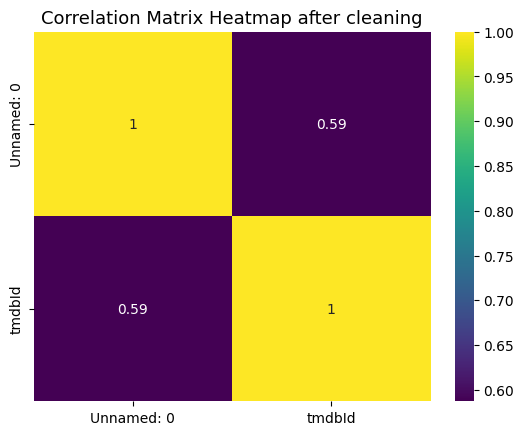

In [18]:
#After Cleaning
# Select only numeric columns for the correlation matrix
numeric_df = df2.select_dtypes(include=[np.number])

#Correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

# Add a title to the heatmap
plt.title('Correlation Matrix Heatmap after cleaning', fontsize=13)
plt.show()

In [19]:
# Merge the datasets
df1 = df1.merge(df2, on='tmdbId')

In [20]:
df1.index.name = 'index'
df1.head(2)

,Unnamed: 0_x,budget,genres,homepage,tmdbId,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Unnamed: 0_y,cast,crew
index,,,,,,,,,,,,,,,,,,,,,
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,1,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


### Preparing data for KNN

In [21]:
# Define a dictionary to store movie titles and their associated genres
title_genres_dict = {}

# Loop through the movies dataframe and store each title and its associated genres in the dictionary
for index, row in df1.iterrows():
    title = row['title']
    genres = row.drop(['title', 'genres']).index[row.drop(['title', 'genres']) == 1].tolist()
    title_genres_dict[title] = genres

# Create a new dataframe with the genre columns as the feature matrix and the title column as the target variable
X = df1.drop(['title', 'genres'], axis=1)
y = df1['title']

In [22]:
genres = df1['genres'].apply(lambda x: pd.Series({genre['name']: 1 for genre in eval(x)}, dtype='float64'))
genres = genres.fillna(0)
genres

,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
index,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5790,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5791,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5792,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Create a set of all unique genres in the dataset
all_genres = set()
for genres_list in df1["genres"]:
    for genre in ast.literal_eval(genres_list):
        all_genres.add(genre["name"])

# Create a dictionary that maps each genre to a unique integer
genre_to_int = {genre: i for i, genre in enumerate(sorted(all_genres))}

# Create a new dataframe that contains one column for each genre, with a 1 
# if the movie belongs to that genre, and 0 otherwise
genre_df = pd.DataFrame(index=df1.index, columns=sorted(all_genres))
for i, genres_list in enumerate(df1["genres"]):
    genres = [genre["name"] for genre in ast.literal_eval(genres_list)]
    for genre in genres:
        genre_df.loc[i, genre] = 1
genre_df.fillna(0, inplace=True)

# Concatenate the genre dataframe with the original movies dataframe
movies_with_genres = pd.concat([df1, genre_df], axis=1)

C:\Users\Taliya Mira\AppData\Local\Temp\ipykernel_24972\3507833354.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  genre_df.fillna(0, inplace=True)


In [24]:
movies_with_genres

,Unnamed: 0_x,budget,genres,homepage,tmdbId,keywords,original_language,original_title,overview,popularity,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
index,,,,,,,,,,,,,,,,,,,,,
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,0,0,0,0,0,1,0,0,0,0
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,0,0,0,0,0,0,0,0,0,0
2,2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,0,0,0,0,0,0,0,0,0,0
3,3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,0,0,0,0,0,0,0,1,0,0
4,4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5790,5793,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",https://www.searchlightpictures.com/flamin-hot,626332,"[{'id': 5565, 'name': 'biography'}, {'id': 967...",en,Flamin' Hot,"The inspiring true story of Richard Montañez, ...",53.988000,...,0,0,0,0,0,0,0,0,0,0
5791,5794,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,1094319,[],en,The Best Man,Mercenaries seize control of a remote resort h...,47.740000,...,0,0,0,0,0,0,0,1,0,0
5792,5795,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,998623,[],fr,Drone Games,No overview available,27.587000,...,0,0,0,0,0,0,0,0,0,0


In [25]:
movies_with_genres.columns

Index(['Unnamed: 0_x', 'budget', 'genres', 'homepage', 'tmdbId', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'Unnamed: 0_y', 'cast', 'crew', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [26]:
X = movies_with_genres.iloc[:, 24:]
X

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
index,,,,,,,,,,,,,,,,,,,,
0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5790,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5791,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5792,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Train and Test/Evaluate the KNN model

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X = movies_with_genres.iloc[:, 24:]
y = movies_with_genres["popularity"].apply(lambda x: 1 if x > movies_with_genres["popularity"].median() else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Define the hyperparameters to tune
params = {'n_neighbors': range(1, 21)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, params, cv=10)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Use the best value of K to fit the KNN model and predict labels
knn_best = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],metric="manhattan")
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

# Calculate the accuracy of the tuned KNN model using cross-validation
cv_scores = cross_val_score(knn_best, X_train, y_train, cv=10)
print("Cross-validation accuracy scores: ", cv_scores)
print("Mean cross-validation accuracy score: ", cv_scores.mean())

# Calculate the accuracy of the tuned KNN model on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: ", accuracy)

Best hyperparameters:  {'n_neighbors': 19}
Cross-validation accuracy scores:  [0.66995074 0.62807882 0.63300493 0.6182266  0.63300493 0.64285714
 0.69382716 0.67407407 0.61481481 0.64691358]
Mean cross-validation accuracy score:  0.6454752782338989
Test accuracy:  0.6313973548016101


In [28]:
print(y_pred)

[0 1 1 ... 0 1 1]


In [29]:
X_test

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
index,,,,,,,,,,,,,,,,,,,,
990,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
262,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5016,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2017,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0
4580,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
466,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3786,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [30]:
X_train

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
index,,,,,,,,,,,,,,,,,,,,
4267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4163,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2675,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3145,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2178,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5742,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3867,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [31]:
#testing on trained data for 5 samples
for i in range(5):
    # Reshape the sample to be a 2D array with a single sample
    sample = X_train.iloc[[i]]
    
    # Use the trained KNN model to predict the popularity of the new movie
    prediction = knn_best.predict(sample)

    # Get the corresponding popularity value from the training data
    popularity_value = y_train.iloc[i]
    
    # Print the prediction and the corresponding popularity value
    if prediction[0] == 1:
        print("The provided movie is predicted to be popular. Actual popularity value:", popularity_value)
    else:
        print("The provided movie is predicted not to be popular. Actual popularity value:", popularity_value)

The provided movie is predicted not to be popular. Actual popularity value: 0
The provided movie is predicted not to be popular. Actual popularity value: 0
The provided movie is predicted to be popular. Actual popularity value: 0
The provided movie is predicted to be popular. Actual popularity value: 0
The provided movie is predicted not to be popular. Actual popularity value: 1


In [32]:
for i in range(9):
    # Reshape the sample to be a 2D array with a single sample
    sample = X_test.iloc[[i]]
    
    # Use the trained KNN model to predict the popularity of the new movie
    prediction = knn_best.predict(sample)

    popularity_value = y_test.iloc[i]
    
    # Print the prediction and the corresponding popularity value
    if prediction[0] == 1:
        print("The provided movie is predicted to be popular. Actual popularity value:", popularity_value)
    else:
        print("The provided movie is predicted not to be popular. Actual popularity value:", popularity_value)


The provided movie is predicted not to be popular. Actual popularity value: 0
The provided movie is predicted to be popular. Actual popularity value: 1
The provided movie is predicted to be popular. Actual popularity value: 1
The provided movie is predicted to be popular. Actual popularity value: 1
The provided movie is predicted not to be popular. Actual popularity value: 0
The provided movie is predicted to be popular. Actual popularity value: 0
The provided movie is predicted not to be popular. Actual popularity value: 0
The provided movie is predicted to be popular. Actual popularity value: 1
The provided movie is predicted not to be popular. Actual popularity value: 1


### Top 10 most Popular movies

In [33]:
# Sort movies by popularity in descending order
popular_movies = df1.sort_values(by='popularity', ascending=False)

# Recommendation function based on popularity
def recommend_popular_movies(n):
    unique_movies = popular_movies.drop_duplicates(subset='title', keep='first')
    # Return the top n unique popular movies
    return unique_movies.head(n)

# Example: Recommend top 10 popular movies
recommendations = recommend_popular_movies(10)
print(recommendations[['tmdbId','title', 'popularity']])

        tmdbId                                          title  popularity
index                                                                    
5540    299054                                    Expend4bles    4086.981
5541    575264  Mission: Impossible - Dead Reckoning Part One    2568.301
5036    554600                       Uri: The Surgical Strike    2046.834
5542    926393                                The Equalizer 3    1965.688
5543    968051                                     The Nun II    1696.620
5544   1034062              Mortal Kombat Legends: Cage Match    1588.164
5548    862552                              The Ritual Killer    1197.084
5545    678512                               Sound of Freedom    1174.757
5546   1151534                                        Nowhere    1162.627
5547    961268                                      Ballerina    1086.482


### Visualization
##### Visualizing the Data

In [34]:
# Method to convert features from Json to list
def transform(obj):
    T = []
    for t in ast.literal_eval(obj):
        t["name"]
        T.append(t["name"])
    return T
visual = df1.copy()
visual["genres"] = visual["genres"].apply(transform)

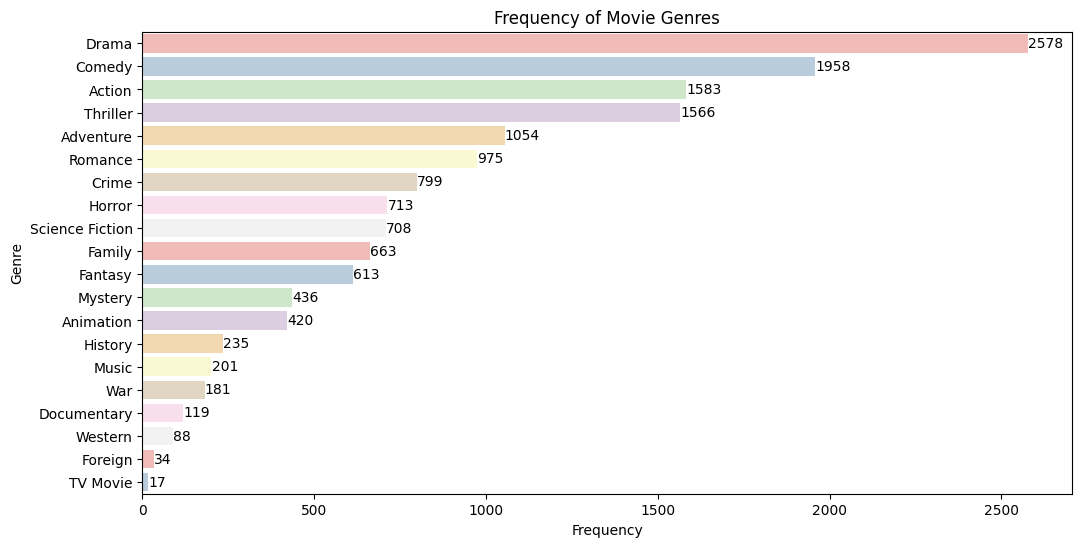

In [35]:
# Bar Chart of Genres

# Calculate genre counts
genre_counts = visual['genres'].explode().value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.index, legend=False, palette='Pastel1')
plt.title('Frequency of Movie Genres')
plt.xlabel('Frequency')
plt.ylabel('Genre')

# Add labels to the bars
for i, count in enumerate(genre_counts.values):
    plt.text(count + 0.5, i, str(count), ha='left', va='center')

plt.show()

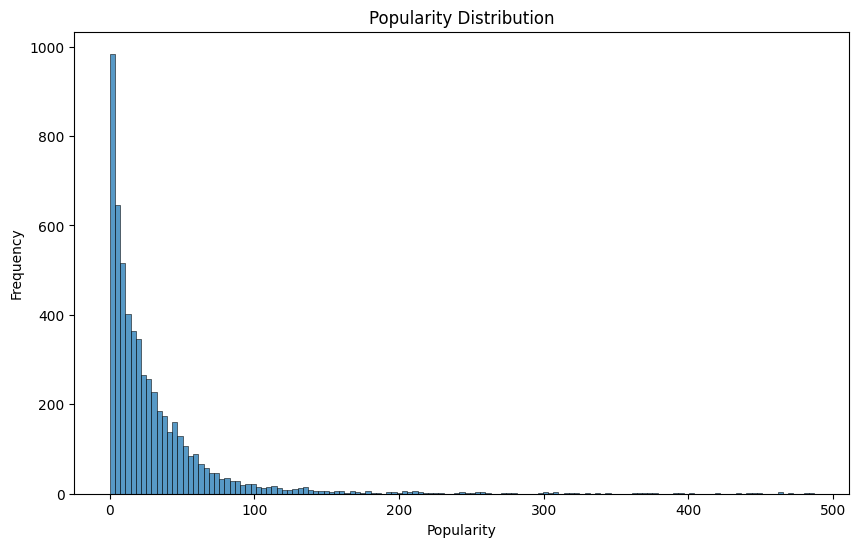

In [36]:
# Define the range of popularity you want to include
popularity_min = 0
popularity_max = 500

# Filter the DataFrame to include only rows where popularity is within the specified range
filtered_visual = visual[(visual['popularity'] >= popularity_min) & (visual['popularity'] <= popularity_max)]

# Plot the histogram for the filtered data
plt.figure(figsize=(10, 6))
sns.histplot(filtered_visual['popularity'])
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


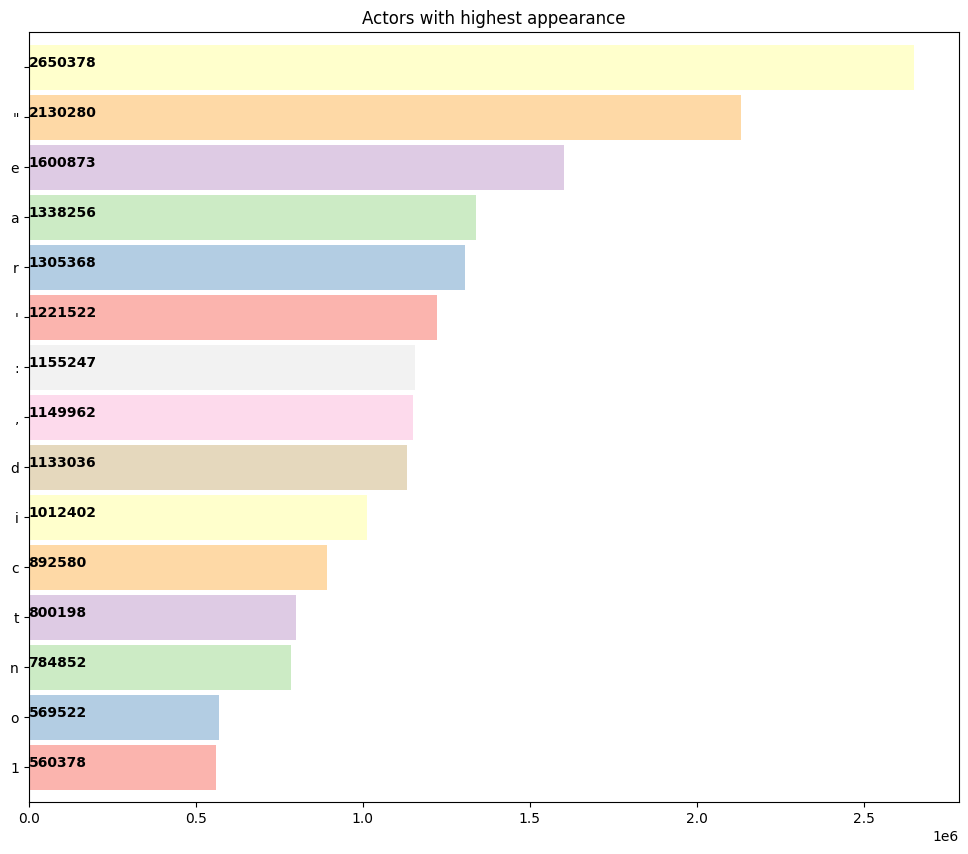

In [37]:
# Actors with highest appearance
plt.subplots(figsize=(12,10))
list1=[]
for i in df2['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('Pastel1',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='black',weight='bold')
plt.title('Actors with highest appearance')
plt.show()

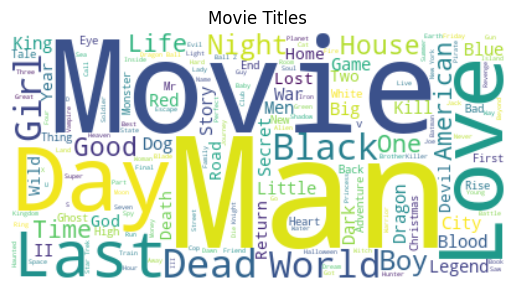

In [38]:
from wordcloud import WordCloud

# join all movie titles into a single string
titles = ' '.join(df1['title'].tolist())

# generate word cloud
wordcloud = WordCloud(background_color='white').generate(titles)

# display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Movie Titles')
plt.show()

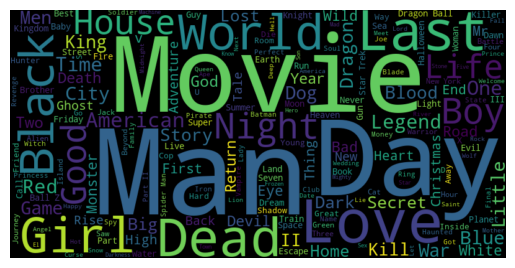

In [39]:
from wordcloud import WordCloud

# Concatenate all movie titles into a single string
all_titles = " ".join(df1["title"])

# Create a word cloud of the movie titles
wordcloud = WordCloud(width=800, height=400).generate(all_titles)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

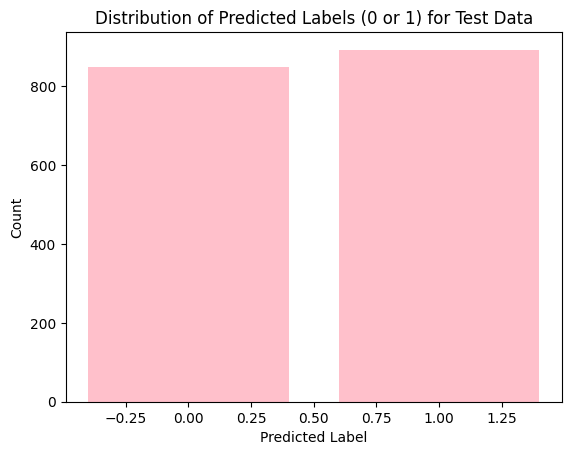

In [40]:
# Count the occurrences of each predicted label
predicted_counts = pd.Series(y_pred).value_counts()

# Plot the bar plot
plt.bar(predicted_counts.index, predicted_counts.values, color="pink")

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.title('Distribution of Predicted Labels (0 or 1) for Test Data')

# Show the plot
plt.show()

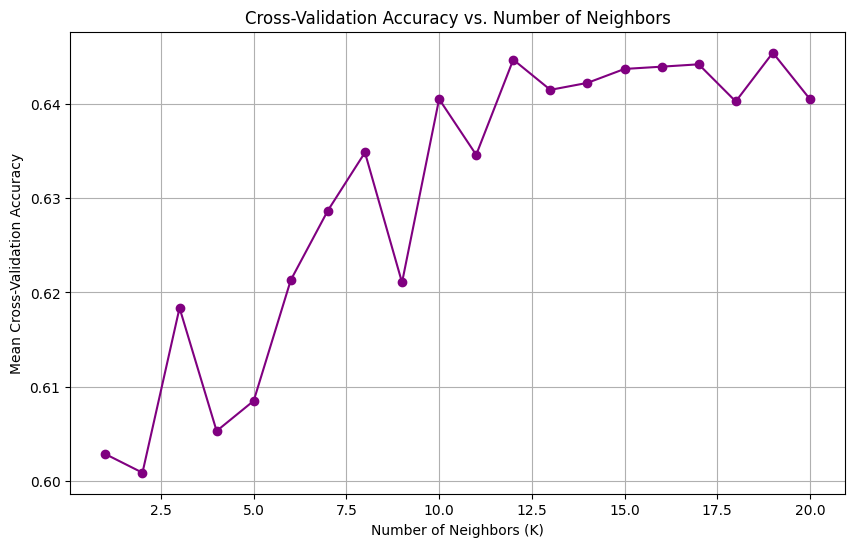

In [44]:
# Extract the results from the grid search
results = grid_search.cv_results_

# Plot mean test scores against the number of neighbors
mean_test_scores = results['mean_test_score']
param_range = params['n_neighbors']

plt.figure(figsize=(10, 6))
plt.plot(param_range, mean_test_scores, marker='o', color="purple")
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()

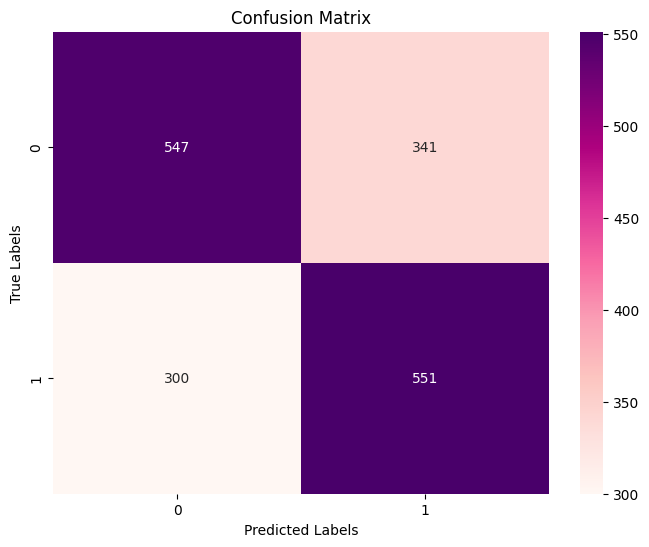

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="RdPu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

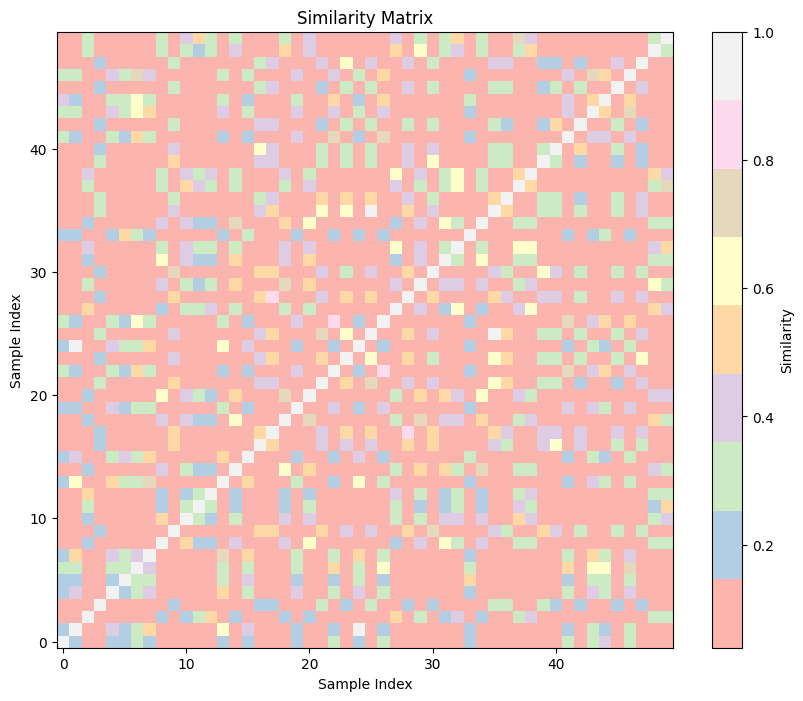

In [42]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances

# Generate a sample dataset
X, _ = make_blobs(n_samples=50, centers=3, random_state=42)

# Compute pairwise distances between samples
distances = pairwise_distances(X, metric='manhattan')

# Convert distances to similarities (e.g., similarity = 1 / (1 + distance))
similarities = 1 / (1 + distances)

# Plot the similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(similarities, cmap='Pastel1', origin='lower')
plt.colorbar(label='Similarity')
plt.title('Similarity Matrix')
plt.xlabel('Sample Index')
plt.ylabel('Sample Index')
plt.show()


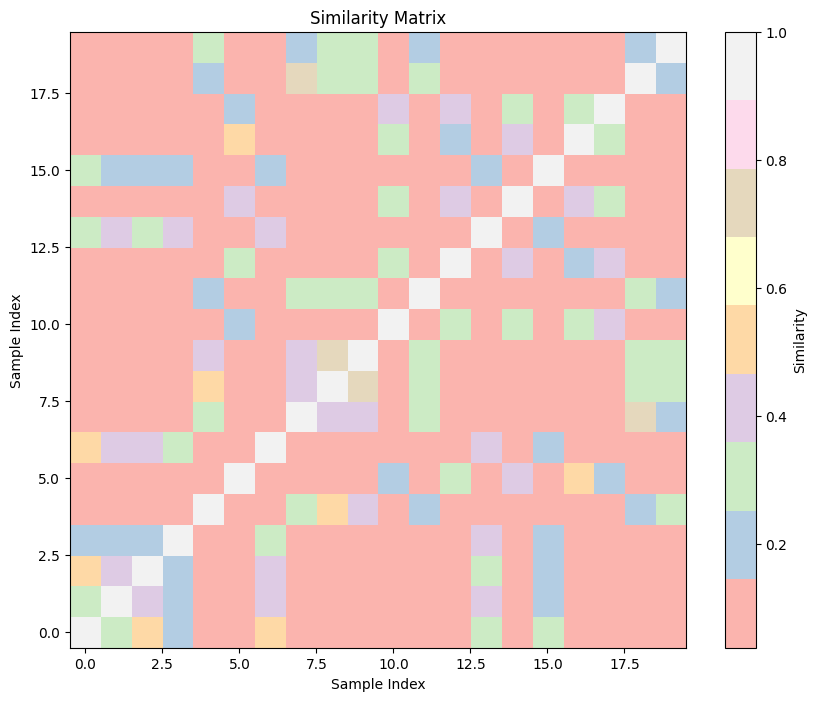

In [43]:
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances

# Generate a sample dataset
X, _ = make_blobs(n_samples=20, centers=3, random_state=42)

# Compute pairwise distances between samples
distances = pairwise_distances(X, metric='manhattan')

# Convert distances to similarities (e.g., similarity = 1 / (1 + distance))
similarities = 1 / (1 + distances)

# Plot the similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(similarities, cmap='Pastel1', origin='lower')
plt.colorbar(label='Similarity')
plt.title('Similarity Matrix')
plt.xlabel('Sample Index')
plt.ylabel('Sample Index')
plt.show()